Objetivos: 
- Replicar em python a regressão linear feita em sala de aula através do gretl;
- Testar o impacto dos fertilizantes na produtividade das lavouras.
- Esperamos que há um impacto positivo do uso de fertilizantes na produtividade das lavouras.

Observações:
- Nesse banco de dados temos um caso de paradoxo de simpson, esse é um caso que acontece quando em um modelo não temos todas as variáveis que influenciam Y e X simultâneamente, podendo causar uma distorção no modelo;
- Os dados já estão tratados, por isso nesse projeto não há a parte de pré processamento dos dados.

Unidades de medida:
- Produtividade: Quilos produzidos por metro quadrado
- Fertilizantes: Litros utilizados por metro quadrado
- Qualidade do Solo: Uma pontuação de 0 a 10

In [3]:
#Lendo a base de dados
import pandas as pd

df = pd.read_excel('Aula Lab 1.xlsx')
df.head()

,Lavoura,Produtividade,Fertilizantes,Qualidade do Solo
0,1,2.5,23.5,0.1
1,2,9.5,24.8,0.7
2,3,5.0,21.5,0.6
3,4,6.0,21.9,0.4
4,5,8.0,25.7,0.0


<AxesSubplot:xlabel='Fertilizantes', ylabel='Produtividade'>

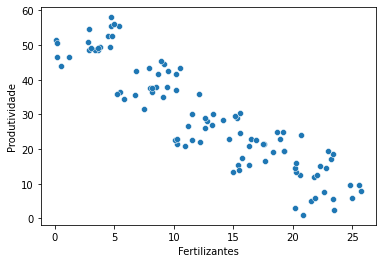

In [4]:
#Plotando os dados
import seaborn as sns

sns.scatterplot(df, x='Fertilizantes', y='Produtividade')

Visualmente já temos um sinal de que há um paradoxo de Simpson nesses dados, pois podemos notar que há diversos grupos de dados com uma certa separação entre eles.

### Vamos realizar a regressão:

In [6]:
#Criando o modelo de regressão linear
import statsmodels.api as sm

x = df[['Fertilizantes']]
y = df[['Produtividade']]

x_com_constante = sm.add_constant(x)

model = sm.OLS(y, x_com_constante, hasconst = True).fit()

In [7]:
#Sumário
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Produtividade   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     454.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.45e-38
Time:                        09:52:15   Log-Likelihood:                -326.13
No. Observations:                 100   AIC:                             656.3
Df Residuals:                      98   BIC:                             661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            53.7914      1.322     40.689

Análise dos resultados:
- Beta 0 -> Temos que a produtividade da lavoura quando não é usado nenhum fertilizante é de 53.8 quilos por metro quadrado
- Beta 1 -> Temos que o acréscimo de 1 litro de fertilizantes diminui a produtividade em 1.9 quilos por metro quadrado
- Podemos dizer que os estimadores citados acima são estatísticamente significantes pois o p-valor é um valor muito pequeno, menor que 5%

Esses resultados vão contra a nossa hipótese inicial, mas antes de concluir qualquer coisa, temos outra variável para testar que acreditamos afetar a produtividade e o uso de fertilizantes simultâneamente.

### Regressão com a variável "Qualidade do solo":

In [8]:
#Criando modelo de regressão
x = df[['Fertilizantes', 'Qualidade do Solo']]
y = df[['Produtividade']]

x_com_constante = sm.add_constant(x)

model_2 = sm.OLS(y, x_com_constante, hasconst = True).fit()

In [9]:
#Sumário
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Produtividade   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1062.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.14e-66
Time:                        09:52:21   Log-Likelihood:                -256.03
No. Observations:                 100   AIC:                             518.1
Df Residuals:                      97   BIC:                             525.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -14.6630      4.02

Análise dos resultados:
- Beta 0 -> Temos que a produtividade da lavoura quando não é usado nenhum fertilizante é de -14.7 quilos por metro quadrado;
- Beta 1 -> Temos que o acréscimo de 1 litro de fertilizantes aumenta a produtividade em 0.8 quilos por metro quadrado;
- Beta 2 -> Temos que o acréscimo de 1 na nota de qualidade do solo, mantendo os fertilizantes constante, aumenta a produtividade em 6.8 quilos por metro quadrado.
- Podemos dizer que os estimadores citados acima são estatísticamente significantes pois o p-valor é um valor muito pequeno, menor que 5%

Considerando a variável "Qualidade do Solo" os resultados nos mostra que a hipótese inicial pode estar certa, os fertilizantes afetam positivamente a produtividade. 

Mas tem algo esquisito, o coeficiente está negativo, acredito ser impossível produzir -14.7 quilos. Uma explicação plausível é de que essa relação não é totalmente linear, pode ser um caso de rendimentos decrescentes, onde há um ponto em que os fertilizantes não trazem mais resultados positivos.

Outro resultado interessante de analisar é o R quadrado e o R quadrado ajustado, eles nos dizem que 95% das variações na produtividade estão sendo explicadas pelas nossas variáveis independentes.